In [1]:
import utils.dataset as dataset
import utils.helpers as helpers
import implementations

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

In [2]:
TRAIN_DATASET = 'data/train.csv'
TEST_DATA = 'data/test.csv'

In [3]:
print("Loading data ..")

# load the train data
Y_train, X_train, indexes = dataset.load_csv_data(TRAIN_DATASET)

# {-1, 1} -> {0l, 1}
Y_train[np.where(Y_train==-1)] = 0.0

print("Load done ..")

Loading data ..
Load done ..


In [4]:
def add_bias_column(X):
    X_temp = np.ones((X.shape[0], X.shape[1]+1))
    X_temp[:,:-1] = X
    X = X_temp
    return X

In [5]:
print("Preprocessing train data ..")

ratio_for_splitting = 0.90

# chosen experimenttally
features_to_delete = [14, 17, 18]

# pre process train data
X_train = dataset.delete_features(X_train, features_to_delete)
X_train = dataset.preprocess_dataset(X_train, 10)

# adding bias to X_train data
X_train = add_bias_column(X_train)

# split_data
Y_train, Y_validation, X_train, X_validation = dataset.split_data(Y_train, X_train, ratio_for_splitting)
helpers.set_validation_dataset(X_validation, Y_validation)

print("Preprocess done ..")

Preprocessing train data ..
Preprocess done ..


In [6]:
print("Preprocessing test data ..")

# load test data for predicting Y_data
Y_test, X_test, indexes = dataset.load_csv_data(TEST_DATA)
Y_test[np.where(Y_test==-1)] = 0.0

# pre process test data
X_test = dataset.delete_features(X_test, features_to_delete)
X_test = dataset.preprocess_dataset(X_test, 10)

X_test = add_bias_column(X_test)

print("Preprocess done ..")

Preprocessing test data ..
Preprocess done ..


In [7]:
### delete

In [8]:
### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ###

In [9]:
### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ###

In [10]:
### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ### PLOT PLOT PLOT ###

In [11]:
# put function to helpers
def plot_train_test(train_errors, test_errors, test_range, title, testparam):
    """
    train_errors, test_errors and lambas should be list (of the same size) the respective train error and test error for a given lambda,
    * lambda[0] = 1
    * train_errors[0] = RMSE of a ridge regression on the train set
    * test_errors[0] = RMSE of the parameter found by ridge regression applied on the test set
    
    degree is just used for the title of the plot.
    """
    plt.semilogx(test_range, train_errors, color='b', marker='*', label="Train error")
    plt.semilogx(test_range, test_errors, color='r', marker='*', label="Test error")
    plt.xlabel(testparam)
    plt.ylabel("R_MSE")
    plt.title(title)
    leg = plt.legend(loc=1, shadow=True)
    leg.draw_frame(False)
    #plt.savefig("ridge_regression")

In [12]:
# defines initial w of size of features
_features = X_train.shape[1]
w_initial = np.zeros((_features), dtype=int)

In [13]:
def regression_gamma_testing(y, x, ratio, seed, test_range, method_name, params, to_test_param):
    # define parameter
    test_range = test_range
    
    # split data into test and train
    x_tr, x_te, y_tr, y_te = dataset.split_data(x, y, ratio, seed)
    c = 0
    
    # store train and test err
    err_train = []
    err_test = []
    
    training_gd_tr = implementations.Training(method_name, params)
    training_gd_te = implementations.Training(method_name, params)
    
    for ind, new_param in enumerate(test_range):
        training_gd_tr.params[to_test_param] = new_param
        print("GAMMA TRAIN", training_gd_tr.params[to_test_param])
        w_tr, mse_tr = training_gd_tr.fit(x_tr, y_tr)
        
        training_gd_te.params[to_test_param] = new_param  
        print("GAMMA test", training_gd_te.params[to_test_param])
        w_te, mse_te = training_gd_te.fit(x_te, y_te)
                
        err_train.append(mse_tr)
        err_test.append(mse_te)
        c += 1
        print(c, "proportion={p}, gamma={g:.3f}, Training RMSE={tr:.5f}, Testing RMSE={te:.5f}".format(
               p=ratio, g=new_param, tr=err_train[ind], te=err_test[ind]))
    plot_train_test(err_train, err_test, test_range, ""+method_name+" - "+to_test_param+" testing", to_test_param)

## Linear regression using gradient descent

GAMMA TRAIN 0.001
Gradient Descent(0/4): gamma=0.001 mse-loss=0.17146913580246914 
Gradient Descent(1/4): gamma=0.001 mse-loss=0.17087763712956291 
Gradient Descent(2/4): gamma=0.001 mse-loss=0.17030503980219402 
Gradient Descent(3/4): gamma=0.001 mse-loss=0.16975041082721123 
Gradient Descent(4/4): gamma=0.001 mse-loss=0.16921286708729935 
GAMMA test 0.001
Gradient Descent(0/4): gamma=0.001 mse-loss=0.17213333333333333 
Gradient Descent(1/4): gamma=0.001 mse-loss=0.17155112794377317 
Gradient Descent(2/4): gamma=0.001 mse-loss=0.17098700879700093 
Gradient Descent(3/4): gamma=0.001 mse-loss=0.17044010218448702 
Gradient Descent(4/4): gamma=0.001 mse-loss=0.1699095797753996 
1 proportion=0.9, gamma=0.001, Training RMSE=0.16921, Testing RMSE=0.16991
GAMMA TRAIN 0.0013894954943731374
Gradient Descent(0/4): gamma=0.0013894954943731374 mse-loss=0.17146913580246914 
Gradient Descent(1/4): gamma=0.0013894954943731374 mse-loss=0.17064987373532958 
Gradient Descent(2/4): gamma=0.00138949549437

Gradient Descent(3/4): gamma=0.019306977288832496 mse-loss=0.15205880101322053 
Gradient Descent(4/4): gamma=0.019306977288832496 mse-loss=0.14848561253550263 
GAMMA test 0.019306977288832496
Gradient Descent(0/4): gamma=0.019306977288832496 mse-loss=0.17213333333333333 
Gradient Descent(1/4): gamma=0.019306977288832496 mse-loss=0.16253076671842487 
Gradient Descent(2/4): gamma=0.019306977288832496 mse-loss=0.15698277378255382 
Gradient Descent(3/4): gamma=0.019306977288832496 mse-loss=0.1527576116867398 
Gradient Descent(4/4): gamma=0.019306977288832496 mse-loss=0.14914205283179544 
10 proportion=0.9, gamma=0.019, Training RMSE=0.14849, Testing RMSE=0.14914
GAMMA TRAIN 0.026826957952797246
Gradient Descent(0/4): gamma=0.026826957952797246 mse-loss=0.17146913580246914 
Gradient Descent(1/4): gamma=0.026826957952797246 mse-loss=0.15895862904661956 
Gradient Descent(2/4): gamma=0.026826957952797246 mse-loss=0.15272350246358518 
Gradient Descent(3/4): gamma=0.026826957952797246 mse-loss=0

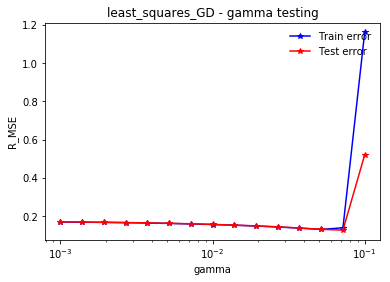

In [14]:
# seed for splitting
seed = 1234
# seed for splitting
split_ratio = ratio_for_splitting
# range of gamma to plot (from, to, iterations)
gamma_range_gd = np.logspace(-3, -1, 15)
# iterations per gamma
iteration_gd = 5
# params for LS-GD
params = {
    'gamma': 0,
    'initial_w': w_initial,
    'max_iters': iteration_gd,
}

regression_gamma_testing(Y_train, X_train, split_ratio, seed, gamma_range_gd, "least_squares_GD", params, "gamma")

## Linear regression using stochastic gradient descent

GAMMA TRAIN 1e-15
SGD(0/4): loss=0.17139753086419704, w0=7.659092642159105e-17, w1=-1.651605289542454e-16
SGD(1/4): loss=0.17139753086419632, w0=1.5320426953957948e-16, w1=-3.319342866229482e-16
SGD(2/4): loss=0.17139753086419574, w0=2.296928863071057e-16, w1=-4.978804881885471e-16
SGD(3/4): loss=0.1713975308641952, w0=3.066686438847505e-16, w1=-6.671534339961463e-16
SGD(4/4): loss=0.1713975308641946, w0=3.83597797863131e-16, w1=-8.326729063956437e-16
GAMMA test 1e-15
SGD(0/4): loss=0.17277777777777717, w0=8.139709804413079e-17, w1=-1.6912678660805298e-16
SGD(1/4): loss=0.17277777777777656, w0=1.6279419608826144e-16, w1=-3.382535732161056e-16
SGD(2/4): loss=0.17277777777777595, w0=2.4419129413239184e-16, w1=-5.073803598241575e-16
SGD(3/4): loss=0.17277777777777534, w0=3.2558839217652194e-16, w1=-6.765071464322088e-16
SGD(4/4): loss=0.17277777777777473, w0=4.0698549022065185e-16, w1=-8.456339330402592e-16
1 proportion=0.9, gamma=0.000, Training RMSE=0.17140, Testing RMSE=0.17278
GAMMA T

SGD(0/4): loss=0.17107083742903567, w0=4.153320282823253e-05, w1=-9.106890844252055e-05
SGD(1/4): loss=0.17075918888451302, w0=8.23431546137361e-05, w1=-0.00017973844219225203
SGD(2/4): loss=0.1704521329065046, w0=0.00012363284552192899, w1=-0.00026972509642013464
SGD(3/4): loss=0.17014967544861828, w0=0.0001644218394799218, w1=-0.00035849096276063065
SGD(4/4): loss=0.16984682830298747, w0=0.00020607212079676583, w1=-0.0004478614743496501
GAMMA test 0.0005411695265464627
SGD(0/4): loss=0.17244882122005453, w0=4.404962901079828e-05, w1=-9.152626303500472e-05
SGD(1/4): loss=0.17212546010684507, w0=8.797540734959914e-05, w1=-0.00018273197226959805
SGD(2/4): loss=0.17180754660993197, w0=0.00013177852788385863, w1=-0.0002736201149986906
SGD(3/4): loss=0.17149493711021602, w0=0.0001754601662763288, w1=-0.00036419363946544236
SGD(4/4): loss=0.1711874920755244, w0=0.00021902148124562488, w1=-0.00045445545541826466
9 proportion=0.9, gamma=0.001, Training RMSE=0.16985, Testing RMSE=0.17119
GAMMA

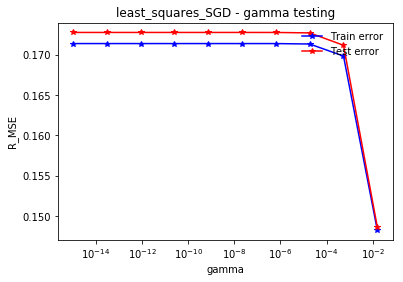

In [15]:

gamma_range_sgd = np.logspace(-15, -1.8, 10)
# iterations per gamma
iteration_sgd = 5
# params for LS-SGD
params = {
    'initial_w': w_initial,
    'batch_size': 100000,
    'max_iters': iteration_sgd,
    'gamma': 0.00005,
}

#SGD_training = implementations.Training("least_squares_SGD", params)
#SGD_training.fit(X_train, Y_train)

regression_gamma_testing(Y_train, X_train, split_ratio, seed, gamma_range_sgd, "least_squares_SGD", params, "gamma")


## Least squares regression using normal equations

## Ridge regression using normal equations

#### Fining hyperparameter lambda

GAMMA TRAIN 0.1
GAMMA test 0.1
1 proportion=0.9, gamma=0.100, Training RMSE=0.07292, Testing RMSE=0.07468
GAMMA TRAIN 0.18329807108324356
GAMMA test 0.18329807108324356
2 proportion=0.9, gamma=0.183, Training RMSE=0.07328, Testing RMSE=0.07509
GAMMA TRAIN 0.33598182862837817
GAMMA test 0.33598182862837817
3 proportion=0.9, gamma=0.336, Training RMSE=0.07358, Testing RMSE=0.07547
GAMMA TRAIN 0.6158482110660264
GAMMA test 0.6158482110660264
4 proportion=0.9, gamma=0.616, Training RMSE=0.07387, Testing RMSE=0.07582
GAMMA TRAIN 1.1288378916846888
GAMMA test 1.1288378916846888
5 proportion=0.9, gamma=1.129, Training RMSE=0.07417, Testing RMSE=0.07613
GAMMA TRAIN 2.0691380811147893
GAMMA test 2.0691380811147893
6 proportion=0.9, gamma=2.069, Training RMSE=0.07451, Testing RMSE=0.07641
GAMMA TRAIN 3.79269019073225
GAMMA test 3.79269019073225
7 proportion=0.9, gamma=3.793, Training RMSE=0.07487, Testing RMSE=0.07670
GAMMA TRAIN 6.951927961775605
GAMMA test 6.951927961775605
8 proportion=0.9, g

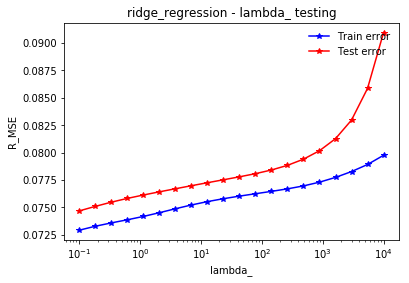

In [16]:
# seed for splitting
seed = 12

# seed for splitting
split_ratio = ratio_for_splitting

# range of lambda to plot (from, to, iterations)
lambdarange = np.logspace(-1, 4, 20)

#ridge_regression_lambda_testing(Y_train, X_train, split_ratio, seed, lambdarange)

params = {
    'lambda_': 0
}
regression_gamma_testing(Y_train, X_train, split_ratio, seed, lambdarange, "ridge_regression", params, "lambda_")


## Logistic regression using gradient descent or SGD

In [17]:
### TODO

## Regularized logistic regression using gradient descent or SGD

In [18]:
### TODO